# 캘리포니아 주택 가격

넘파이와 판다스 기본 설정

In [1]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, suppress=True)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 원래 60이 기본.
pd.options.display.max_rows = 20

In [2]:
import matplotlib.pyplot as plt

## 캘리포니아 데이터셋

1990년대 초에 캘리포니아 주를 20640 개 구역으로 쪼갠 후 구역별로 통계 자료를 조사한 데이터셋이다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/LA-USA01.png" width="600"></div>

구역별로 다음 10개 내용을 조사했다.

| 특성 | 의미 |
| :--- | :--- |
| `'longitude'` | 위도 |
| `'latitude'` | 경도 |
| `'housing_median_age'` | 건축물 중위연령 |
| `'total_rooms'` | 방의 총 개수 |
| `'total_bedrooms'` | 침실 총 개수 |
| `'population'` | 인구 |
| `'households'` | 가구수 |
| `'median_income'` | 중위소득 |
| `'median_house_value'` | 주택 중위가격 |
| `'ocean_proximity'` | 해안 근접도 |

### 캘리포니아 데이터셋 다운로드

아래 주소에 tgz 압축 파일로 저장되어 있다.
해당 파일을 다운로드해서 특정 폴더에 저장한 후에
압축을 풀면 csv 파일이 생성되며, 이를 데이터프레임으로 불러온다.

아래 `load_housing_data()` 함수가 이 과정을 모두 처리한다.

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

데이터셋 다운로드 후 데이터프레임으로 적재한다.

In [4]:
housing = load_housing_data()

### 데이터셋 기본 정보 확인

총 20640개의 데이터 샘플이 포함되며, 10개의 특성(열)을 포함한다.

In [5]:
housing.shape

(20640, 10)

In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


10개 특성의 이름은 다음과 같다.

In [7]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

`info()` 메서드를 이용하여 데이터셋 전체에 대한 기본 정보를 확인한다.

- `'total_bedrooms'` 특성: 207개의 결측치 포함
- `'ocean_proximity'` 특성: 수치형 데이터 아님

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`'ocean_proximity'` 특성은 구역별로 5개의 범주로 구분된 해안 근접도를 나타낸다.

| 해안근접도 | 의미 |
| :--- | :--- |
| Near Bay | 샌프란시스코의 Bay Area 근처 구역 |
| <1H OCEAN | 바다로부터 1시간 이내 거리 |
| INLAND | 내륙 |
| NEAR OCEAN | 해안가 |
| ISLAND | 섬 |

In [9]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

해안 근접도별 구역 수는 다음과 같다.

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 데이터 특성 살펴보기

### 위치 정보 시각화

경도와 위도 정보를 이용해서 구역의 분포를 살펴본다.

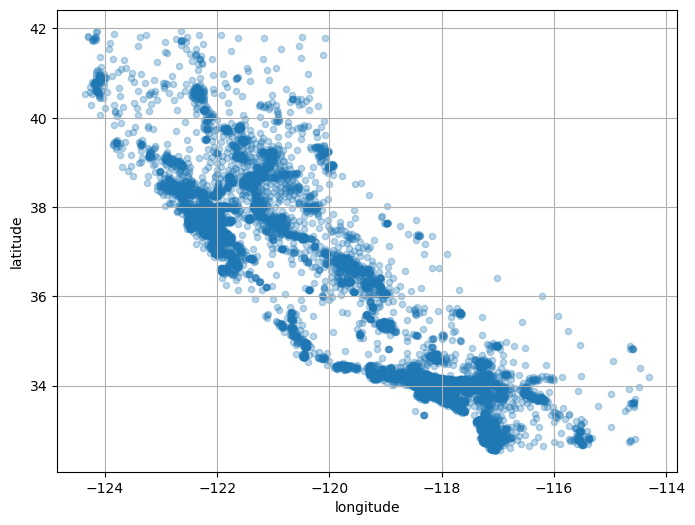

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.3, figsize=(8, 6))
plt.show()

주택 중위가격을 색상으로 활용하면 다른 정보를 준다.

* `s=housing["population"] / 100`: 구역별 인구수에 비례해서 원의 크기 지정
* `c="median_house_value"`: 주택 중위가격을 색상 지정에 이용
* `cmap="turbo"`: [colormap 지정](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

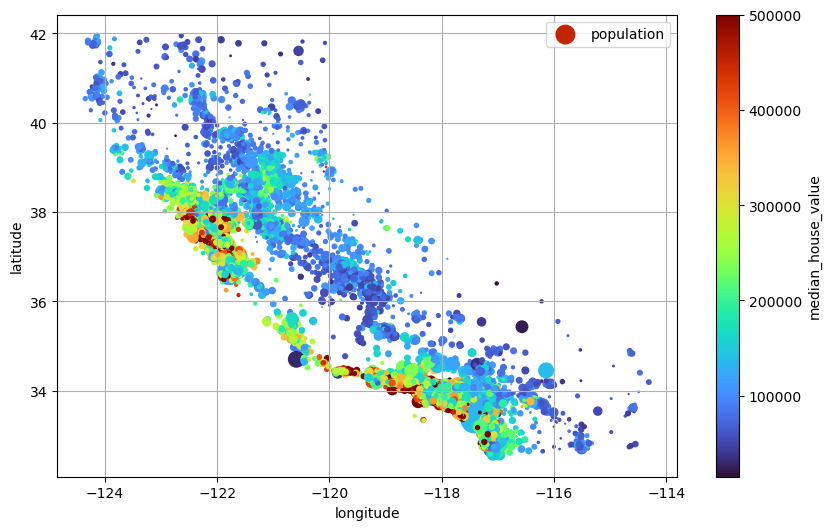

In [12]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", 
             cmap="turbo", 
             colorbar=True,
             figsize=(10, 6))
plt.show()

캘리포니아 실제 지도위에 그래프를 그린다.

In [13]:
# 캘리포니아 지도 다운로드

IMAGES_PATH = Path() / "images"  # 이미지 저장 경로
filename = "california.png"      # 이미지 파일명
if not (IMAGES_PATH / filename).is_file():  # 이미지 파일이 없으면 다운로드 후 저장
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

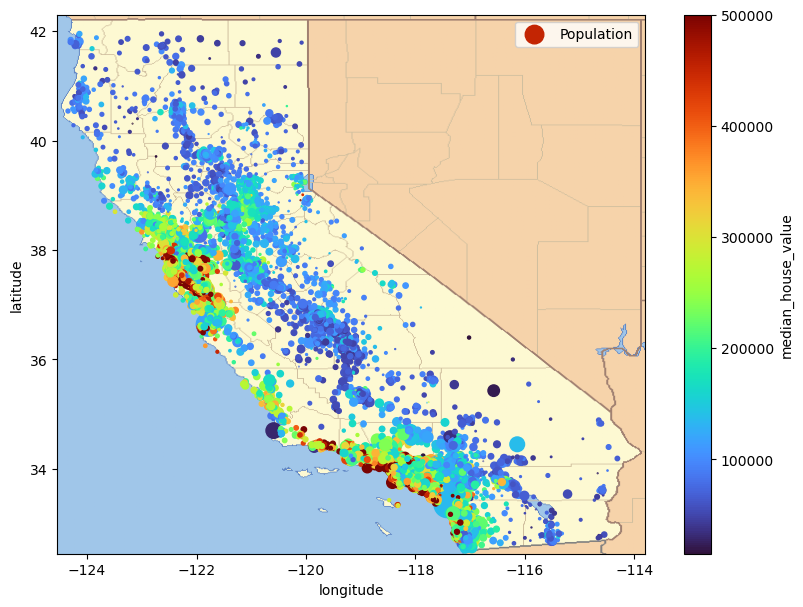

In [14]:
# 위도/경도를 이용한 구역별 인구 산포도
housing.plot(kind="scatter", 
                     x="longitude", 
                     y="latitude",
                     s=housing["population"] / 100, label="Population",
                     c="median_house_value", 
                     cmap="turbo", 
                     colorbar=True,
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도 표시
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.8, 32.45, 42.3                # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

### 해안 근접도 시각화

해안 근접도에 따른 구역의 위치를 지도에 확인한다.
이를 위해 해안 근접도 특성을 정수화 한다.
이유는 데이터프레임의 항목별로 색깔을 지정하려면 숫자로 값을 변환해야 하기 때문이다.

| 해안 근접도 | 숫자 |
| :---: | :---: |
| Near Bay | 0 |
| <1H Ocean | 1 |
|INLAND | 2 |
| Near Ocean | 3 |
| ISLAND | 4 |

`pd.factorize()` 함수는 범주형 데이터를 수치형 데이터로 변환한다.
반환값은 변환된 숫자로 구성된 넘파이 어레이와 변환에 사용된 순서대로의 범주형 데이터로 구성된 인덱스로
구성된 튜플이다.

In [15]:
pd.factorize(housing["ocean_proximity"])

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64),
 Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object'))

해안 근접도가 수치형 데이터로 변환된 값으로 구성된 `'ocean_p'` 특성을 추가한다.
이를 위해 앞서 설명한 대로 `pd.factorize()` 함수의 반환값의 첫째 항목을 이용한다.

In [16]:
housing["ocean_p"] = pd.factorize(housing["ocean_proximity"])[0]

이제 해안 근접도를 색상으로 지정하고 산점도를 캘리포니아 지도와 함께 그리면 해안 근접도의 의미가 보다 분명해진다.

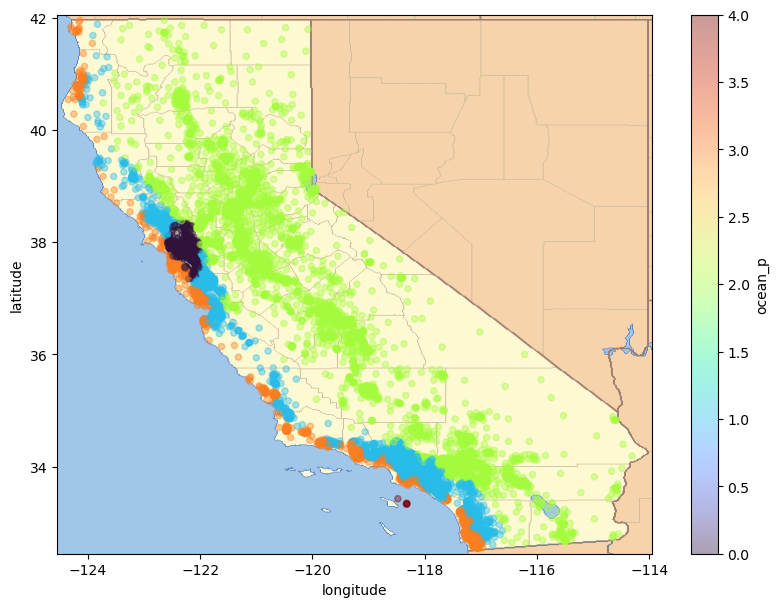

In [17]:
# 위도/경도를 이용한 구역별 인구 산포도
housing.plot(kind="scatter", 
                     x="longitude", 
                     y="latitude",
                     c="ocean_p", 
                     cmap="turbo", 
                     colorbar=True,
                     alpha=0.4,        # 투명도 조절
                     figsize=(10, 7))

# 다운로드된 캘리포티아 지도
california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05  # x축, y축 눈금
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

### 특성별 히스토그램

`hist()` 메서드는 수치형 특성(라벨)에 대해 히스토그램을 그린다.
여기서는 해안 근접도를 수치화한 특성을 포함해서 10개의 특성에 대한 히스토그램을 그린다.
해안 근접도 히스토그램을 통해 1번, 즉 해안으로부터 1시간 이내에 위치한 구역이 가장 많음을 알 수 있다.

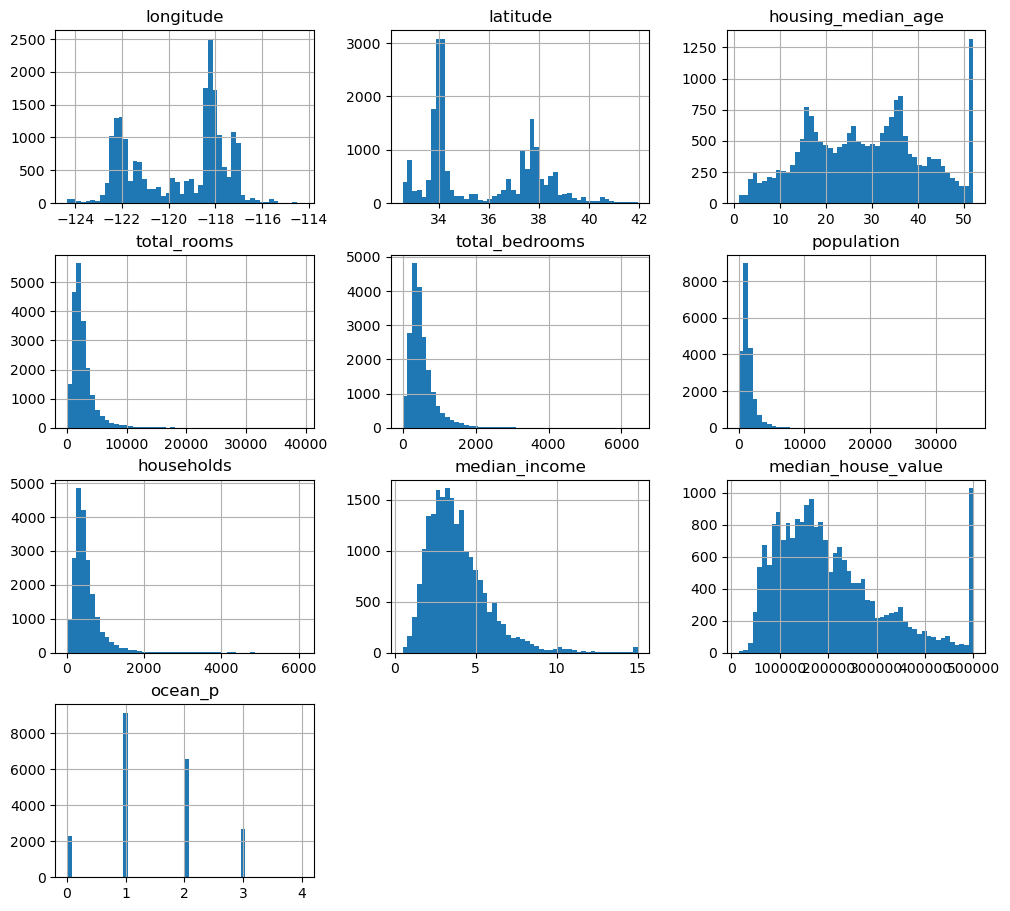

In [18]:
housing.hist(bins=50, figsize=(12, 11))
plt.show()

### 중위소득 구간 나누기

`'median_income'` 특성의 히스토그램은 다음과 같다.

중위소득을 구간의 크기를 1.5 정도로 총 5개 구간으로 쪼개 후 각 구간에 대해 1, 2, 3, 4, 5의 라벨을 사용한다.

| 구간 | 라벨 |
| :---: | :---: |
| 1.5 이하 | 1 |
| (1.5, 3.0] | 2 |
| (3.0. 4.5] | 3 |
| (4.5, 6.0] | 4 |
| 6.0 초과 | 5 |

In [19]:
bins=[0., 1.5, 3.0, 4.5, 6., np.inf]

housing_income_cat = pd.cut(housing["median_income"],
                            bins=bins,
                            labels=[1, 2, 3, 4, 5])

housing_income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

중위소득 구간별 구역의 수를 확인하고 인덱스를 기준으로 정렬한다.

In [20]:
housing_income_cat_sorted_index = housing_income_cat.value_counts().sort_index()
housing_income_cat_sorted_index

1     822
2    6581
3    7236
4    3639
5    2362
Name: median_income, dtype: int64

중위소득 구간별 구역의 수를 막대그래프로 그린다.

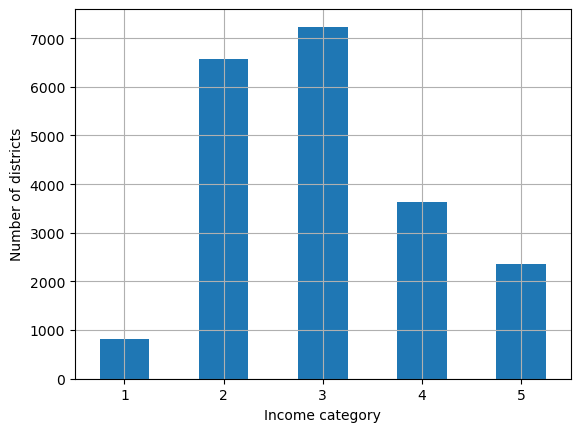

In [21]:
housing_income_cat_sorted_index.plot(kind='bar', rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### 특성별 상관관계

수치형 특성들 사이의 상관관계를 계산한다.

In [22]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_p
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_p,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


주택 중위가격과 기타 특성들 사이의 상관관계는 다음과 같다.
또한 상관관계가 높은 순서대로 정렬한다.

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_p              -0.210600
Name: median_house_value, dtype: float64

주택 중위가격과 중위소득 사이의 상관관계가 가장 높다. 
반면에 건축물 중위연령은 주택 중위가격이나 중위소득과 별 상관이 없어 보인다.
이런 사실을 세 특성들 사이의 일대일 산점도를 그려 확인할 수 있다.
여러 특성들 사이의 일대일 산점도를 함 전에 그리는 `pd.plotting.scatter_matrix()` 함수를 이용한다.
자신과의 상관관계는 전혀 중요하지 않기에 대각선상은 각 특성의 히스토그램이 그려진다.

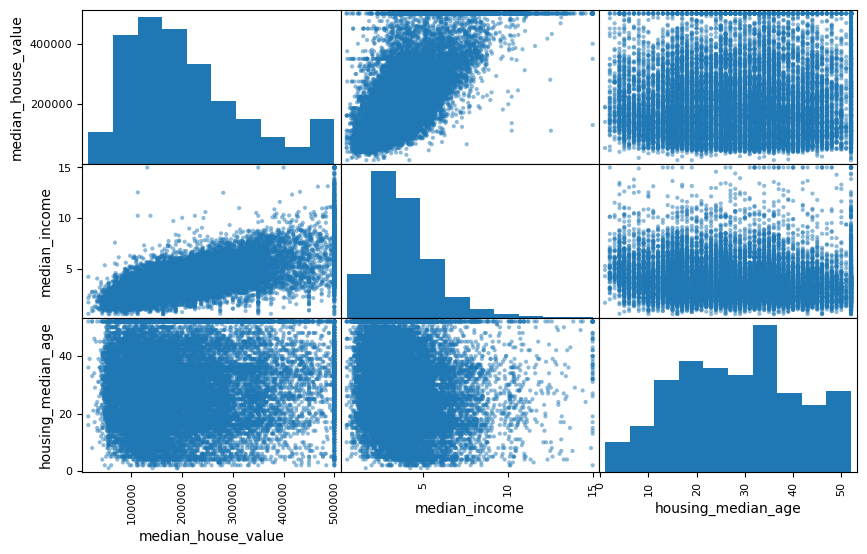

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 6))
plt.show()

## 데이터 전처리

### 이상치 처리

중위소득과 주택 중위가격 사이의 상관관계만 따로 확대해서 보면 다음과 같다.

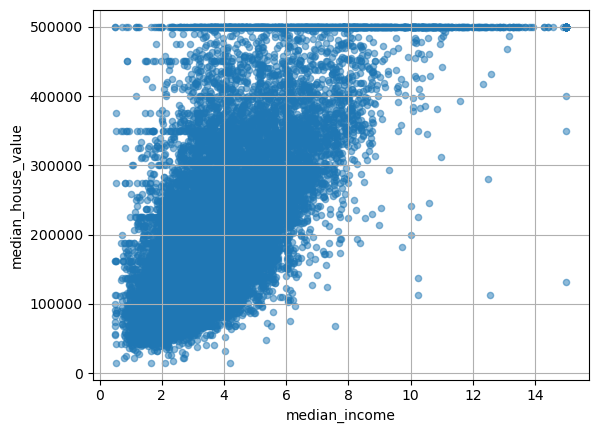

In [25]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value",
             alpha=0.5, 
             grid=True)
plt.show()

주택 중위가격이 50만 달러에 해당하는 데이터가 좀 이상하다. 
그림에서 보여지듯이 칼로 자른 듯한 데이터는 현실에서는 존재하지 않는다.
아마도 50만 달러 이상은 모두 50만 달러로 자른 것 같다.

이런 경우엔 해당 데이터들을 이상치로 간주해서 삭제하는 게 좋다.
`value_counts()` 메서드를 이용하여 확인하면 정확히 50만1달러 샘플이 965개 있다
따라서, 50만 달러를 초과하는 주택은 50만1달러로 통일한 것으로 보인다.

In [26]:
housing.median_house_value.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
41000.0       1
328200.0      1
300500.0      1
487500.0      1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

주택 중위소득이 50만1달러인 샘플은 제외한다.

In [27]:
mask = housing.median_house_value != 500001
housing = housing[mask].copy()

50만1달러 주택은 모두 제외시켰다.
이제 가장 비싼 주택 중위가격은 50만 달러다.

In [28]:
housing.median_house_value.describe()

count     19675.000000
mean     192477.921017
std       97711.509613
min       14999.000000
25%      116600.000000
50%      173800.000000
75%      248200.000000
max      500000.000000
Name: median_house_value, dtype: float64

산점도를 다시 그리면 이상한 선이 더 이상 보이지 않는다.

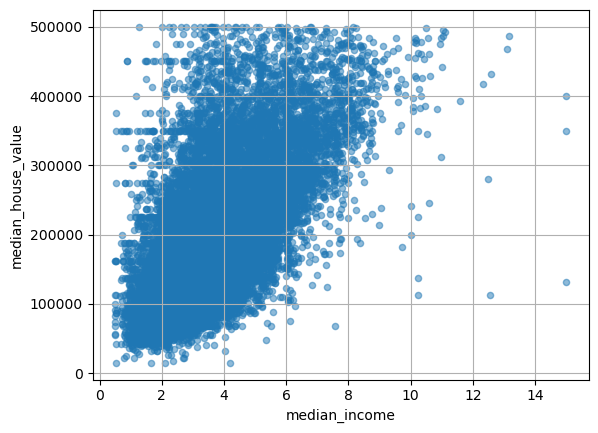

In [29]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value",
             alpha=0.5, 
             grid=True)
plt.show()

### 결측치 처리

`total_bedrooms` 특성(라벨)에 결측치가 200개 있다.
원래 207개 이지만 앞서 50만1달러 주택 중위가격 데이터를 삭제했기 때문에 200개로 줄었다.

In [30]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
ocean_p                 0
dtype: int64

결측치를 포함한 데이터 샘플을 다음과 같이 확인한다.

In [31]:
mask = housing.isnull().any(axis=1)
housing[mask]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_p
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN,1
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND,2
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,3
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND,2
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN,1
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND,2
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,1


데이터 샘플 수는 200개로 다시 한 번 확인된다.

In [32]:
housing[mask].shape

(200, 11)

결측치를 포함한 데이터 샘플은 삭제하거나 아니면 다른 값으로 채운다.
여기서는 해당 열의 중위수로 채우는 방식을 이용한다.
아래 코드는 `'total_bedrooms'` 열의 중위수로 결측치를 채운다.

In [33]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

결측치가 모두 중위수로 변환된 것을 확인할 수 있다.

In [34]:
housing[mask]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_p
182,-118.27,34.04,13.0,1784.0,436.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN,1
327,-117.65,34.04,15.0,3393.0,436.0,2039.0,611.0,3.9336,151000.0,INLAND,2
366,-122.50,37.75,44.0,1819.0,436.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,3
477,-117.99,34.14,30.0,2346.0,436.0,1988.0,474.0,2.5625,153000.0,INLAND,2
495,-114.59,34.83,41.0,812.0,436.0,375.0,158.0,1.7083,48500.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,436.0,1417.0,302.0,2.3333,92100.0,<1H OCEAN,1
19952,-119.19,34.20,18.0,3620.0,436.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3
20088,-119.73,36.83,8.0,3602.0,436.0,1959.0,580.0,5.3478,138800.0,INLAND,2
20325,-118.88,34.17,15.0,4260.0,436.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN,1


이제 데이터셋에 결측치가 하나도 없다.

In [35]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
ocean_p               0
dtype: int64

### 데이터 스케일링

데이터 스케일링은 수치형 특성에 포함된 데이터의 크기(scale)를 조정하는 기법을 가리킨다.
데이터분석 분야에서 가장 많이 활용되는 스케일링 기법은 다음 세가지다.

- 표준화
- 정규화
- 로그 변환

#### 표준화

표준화는 특성(열)별로 평균값은 0, 표준편차는 1이 되도록 값들을 변환시키는 기법이다.
즉, 아래 식에서 처럼 원래의 값 $x$에서 해당 데이터셋의 평균값($\mu$)을 뺀 다음에 
해당 데이터셋의 표준편차($\sigma$)로 나눈다.

$$z = \frac{x - \mu}{\sigma}$$

변환된 값 $z$로 구성된 데이터셋의 평균값은 0, 표준편차는 1이 되어 표준정규분포에 가까운 데이터 분포를 갖는다.
각 특성의 평균값과 표준편차를 먼저 계산하기 위해 해안 근접도 특성을 제외한 모든 특성이 수치형 특성이기에 제외한다.

In [36]:
housing_numerical = housing.drop(["ocean_proximity", "ocean_p"], axis=1)
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


- 특성별 평균값

In [37]:
mean_df = housing_numerical.mean()
mean_df

longitude               -119.563192
latitude                  35.651780
housing_median_age        28.386277
total_rooms             2619.763659
total_bedrooms           538.592173
population              1440.812198
households               501.186023
median_income              3.676717
median_house_value    192477.921017
dtype: float64

- 특성별 표준편차

In [38]:
std_df = housing_numerical.std()
std_df

longitude                 2.006108
latitude                  2.149802
housing_median_age       12.509113
total_rooms            2181.348207
total_bedrooms          420.389237
population             1143.648725
households              383.264636
median_income             1.570272
median_house_value    97711.509613
dtype: float64

수치형 특성의 표준화는 이제 매우 간단하게 계산된다.

In [39]:
housing_standardized = housing_numerical.sub(mean_df, axis=1).div(std_df, axis=1)
housing_standardized

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.329344,1.036477,1.008363,-0.797563,-0.974317,-0.978283,-0.978922,2.960305,2.662144
1,-1.324359,1.027174,-0.590472,2.053426,1.349720,0.839583,1.661552,2.945148,1.699105
2,-1.334329,1.022522,1.887722,-0.528464,-0.829213,-0.826138,-0.845854,2.280295,1.633606
3,-1.339313,1.022522,1.887722,-0.616941,-0.722169,-0.771926,-0.736269,1.252257,1.523076
4,-1.339313,1.022522,1.887722,-0.455115,-0.615126,-0.765805,-0.631903,0.107932,1.532287
...,...,...,...,...,...,...,...,...,...
20635,-0.761079,1.780732,-0.270705,-0.437694,-0.391523,-0.520975,-0.446652,-1.347803,-1.170568
20636,-0.820897,1.785383,-0.830297,-0.881457,-0.924363,-0.948554,-1.010232,-0.713200,-1.180802
20637,-0.825881,1.757474,-0.910239,-0.167678,-0.127482,-0.379323,-0.177908,-1.258838,-1.025242
20638,-0.875729,1.757474,-0.830297,-0.348300,-0.308267,-0.611912,-0.397078,-1.152359,-1.103022


변환된 데이터들의 분포를 확인하면 실제로 특성별로 평균값은 거의 0, 표준편차는 거의 1로 확인된다.

In [40]:
housing_standardized.describe().loc[["mean", "std"]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
mean,-1.261100e-15,-2.065720e-16,-9.154896e-17,7.493653e-17,1.305521e-16,-1.950155e-17,2.907176e-17,2.329352e-17,-9.823005e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### 정규화

정규화는 특성별로 최소값은 0, 최대값은 1로 만들며 아래 공식을 이용한다.

$$z = \frac{x-\min}{\max-\min}$$

$\max$와 $\min$은 각각 특성별 최대값과 최소값을 가리킨다.
그러면 $x=\min$일 때 $z=0$이 되고, 
$x=\max$일 때 $z=1$이 된다.

- 특성별 최대값

In [41]:
max_df = housing_numerical.max()
max_df

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500000.0000
dtype: float64

- 특성별 최소값

In [42]:
min_df = housing_numerical.min()
min_df

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            2.0000
population                3.0000
households                2.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

수치형 특성의 정규화는 다음과 같다.

In [43]:
housing_normalized = housing_numerical.sub(min_df, axis=1).div(max_df - min_df, axis=1)
housing_normalized

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0.902268
1,0.212151,0.565356,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0.708248
2,0.210159,0.564293,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0.695052
3,0.209163,0.564293,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0.672784
4,0.209163,0.564293,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0.674640
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057737,0.023599,0.053947,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.022971,0.009894,0.018421,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.074965,0.028140,0.070888,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063169,0.020684,0.057072,0.094295,0.143713


실제로 특성별 최소값은 0, 최대값은 1이다.

In [44]:
housing_normalized.describe().loc[["min", "max"]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 로그 변환

다음 다섯 개 특성의 히스토그램을 보면 데이터의 분포가 정규분포를 따르지 않는다. 

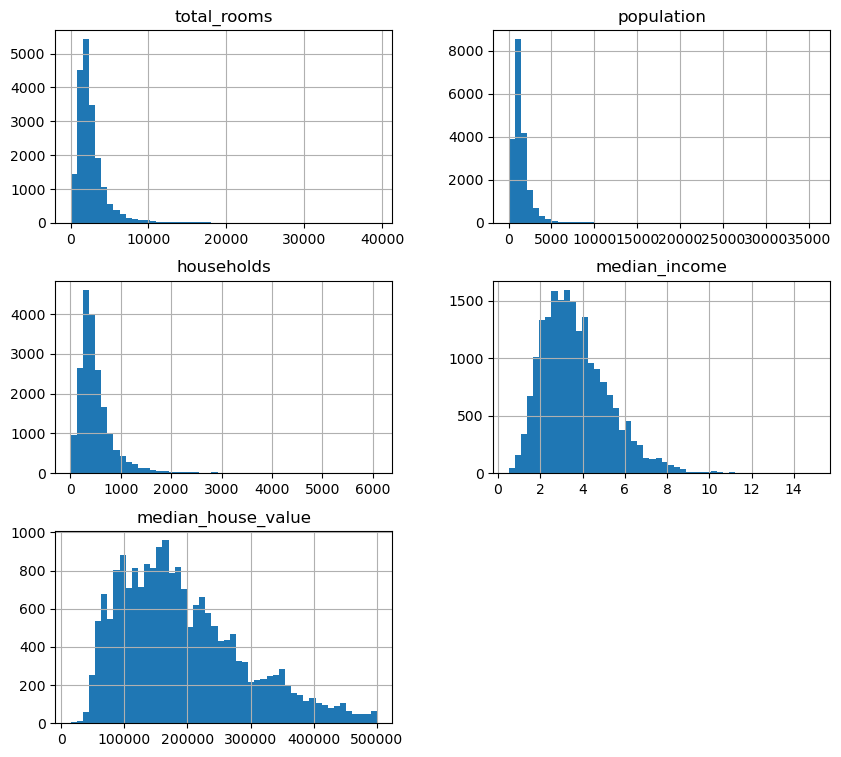

In [45]:
housing_numerical[["total_rooms", "population","households", "median_income", "median_house_value"]].hist(bins=50, figsize=(10, 9))
plt.show()

이런 경우 모든 값들에 대해 로그 함수를 적용하여 변환하면 보다 정규분포에 가까운 히스토그램을 얻는다.
이렇게 모든 값에 `np.log()` 함수를 적용해서 데이터를 변환하는 기법이 로그 변환이다.

In [46]:
housing_log_transfomred = housing_numerical[["total_rooms", "population","households", "median_income", "median_house_value"]].apply(np.log)
housing_log_transfomred

,total_rooms,population,households,median_income,median_house_value
0,6.779922,5.774552,4.836282,2.119287,13.022764
1,8.867709,7.783641,7.037028,2.116424,12.789684
2,7.290975,6.206576,5.176150,1.982022,12.771671
3,7.149917,6.324359,5.389072,1.730434,12.740517
4,7.394493,6.336826,5.556828,1.347086,12.743151
...,...,...,...,...,...
20635,7.417580,6.739337,5.799093,0.444878,11.265745
20636,6.546785,5.874931,4.736198,0.938756,11.252859
20637,7.720462,6.914731,6.070738,0.530628,11.432799
20638,7.528332,6.608001,5.855072,0.624440,11.346871


변환된 특성들의 히스토그램을 보면 보다 정규분포에 가까워졌다.

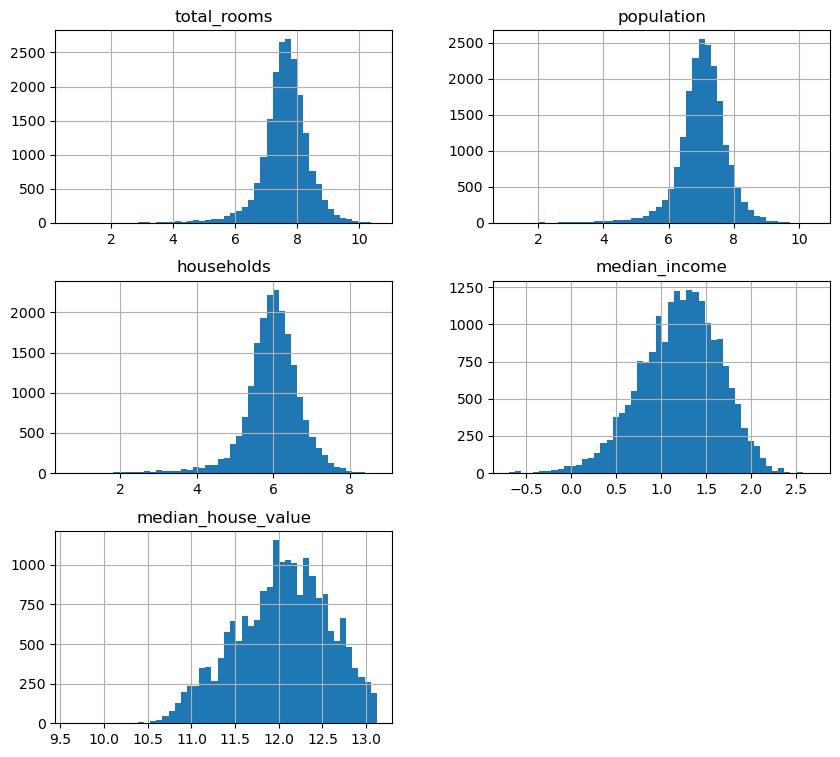

In [47]:
housing_log_transfomred.hist(bins=50, figsize=(10, 9))
plt.show()